In [9]:
%%capture
!pip install tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np

In [10]:
targets_array = np.load('../data/targets_array.npy', allow_pickle=True)
features_array = np.load('../data/features_array.npy', allow_pickle=True)

In [11]:
test_files = ['5.06-_The_Abdications_of_Bayonne_Master.mpga',
 '8.3-_The_Government_of_National_Defence_Master.mpga',
 '10.23-_On_Agitation_Master.mpga',
 '3.17-_A_Temporary_Summit.mpga',
 '015-_The_Good_Old_Cause.mpga',
 '003-_The_Bishops_Wars.mpga',
 '4.19-_The_History_of_Haiti_Master.mpga',
 '10.91-_The_Battle_of_Warsaw_Master.mpga',
 '6.05-_The_Barricades_Master.mpga',
 '8.7-_Year_79_1.mpga']

In [12]:
sequence_length = 1000
num_features = 13
batch_size = 32
all_dataset = tf.data.Dataset.from_tensor_slices((features_array, targets_array)).shuffle(buffer_size = 5)

In [13]:
len(all_dataset)

59535

In [14]:
val_dataset = all_dataset.take(8916).padded_batch(batch_size) 
train_dataset = all_dataset.skip(8916).padded_batch(batch_size)

In [26]:
inputs = keras.Input(shape=(sequence_length, num_features))
x = layers.LSTM(32, return_sequences=True, recurrent_dropout=0.5)(inputs)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_features)(x)
model = keras.Model(inputs, outputs)

In [27]:
callbacks = [
    keras.callbacks.ModelCheckpoint("lstm.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mse", tf.keras.metrics.CosineSimilarity(axis=1)])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks,
                    batch_size=batch_size)

Epoch 1/10
1582/1582 [==============================] - 1672s 1s/step - loss: 7515.2358 - mse: 7515.2354 - cosine_similarity: 0.4110 - val_loss: 6344.4126 - val_mse: 6344.4116 - val_cosine_similarity: 0.4330
Epoch 2/10
1582/1582 [==============================] - 1668s 1s/step - loss: 5391.6382 - mse: 5391.6382 - cosine_similarity: 0.4258 - val_loss: 4597.1738 - val_mse: 4597.1743 - val_cosine_similarity: 0.4364
Epoch 3/10
1582/1582 [==============================] - 1657s 1s/step - loss: 3996.2000 - mse: 3996.1997 - cosine_similarity: 0.4341 - val_loss: 3452.6282 - val_mse: 3452.6265 - val_cosine_similarity: 0.4546
Epoch 4/10
1582/1582 [==============================] - 1313s 830ms/step - loss: 3041.0596 - mse: 3041.0591 - cosine_similarity: 0.4545 - val_loss: 2602.0071 - val_mse: 2602.0073 - val_cosine_similarity: 0.4938
Epoch 5/10
1582/1582 [==============================] - 1666s 1s/step - loss: 2341.6387 - mse: 2341.6379 - cosine_similarity: 0.4816 - val_loss: 1960.8308 - val_mse:

In [28]:
model.save('../bin/rnn_model1.2')

INFO:tensorflow:Assets written to: ../bin/rnn_model1.2/assets


In [23]:
model = keras.models.load_model('../bin/rnn_model1.1')

In [30]:
cosine_similarity = history.history['cosine_similarity']
mean_squared_error = history.history['mse']
cosine_similarity

[0.4109705090522766,
 0.4257616102695465,
 0.4341137409210205,
 0.45450708270072937,
 0.481608510017395,
 0.5085229277610779,
 0.5338836908340454,
 0.5573857426643372,
 0.5778840780258179,
 0.5942612290382385]

<function matplotlib.pyplot.show(close=None, block=None)>

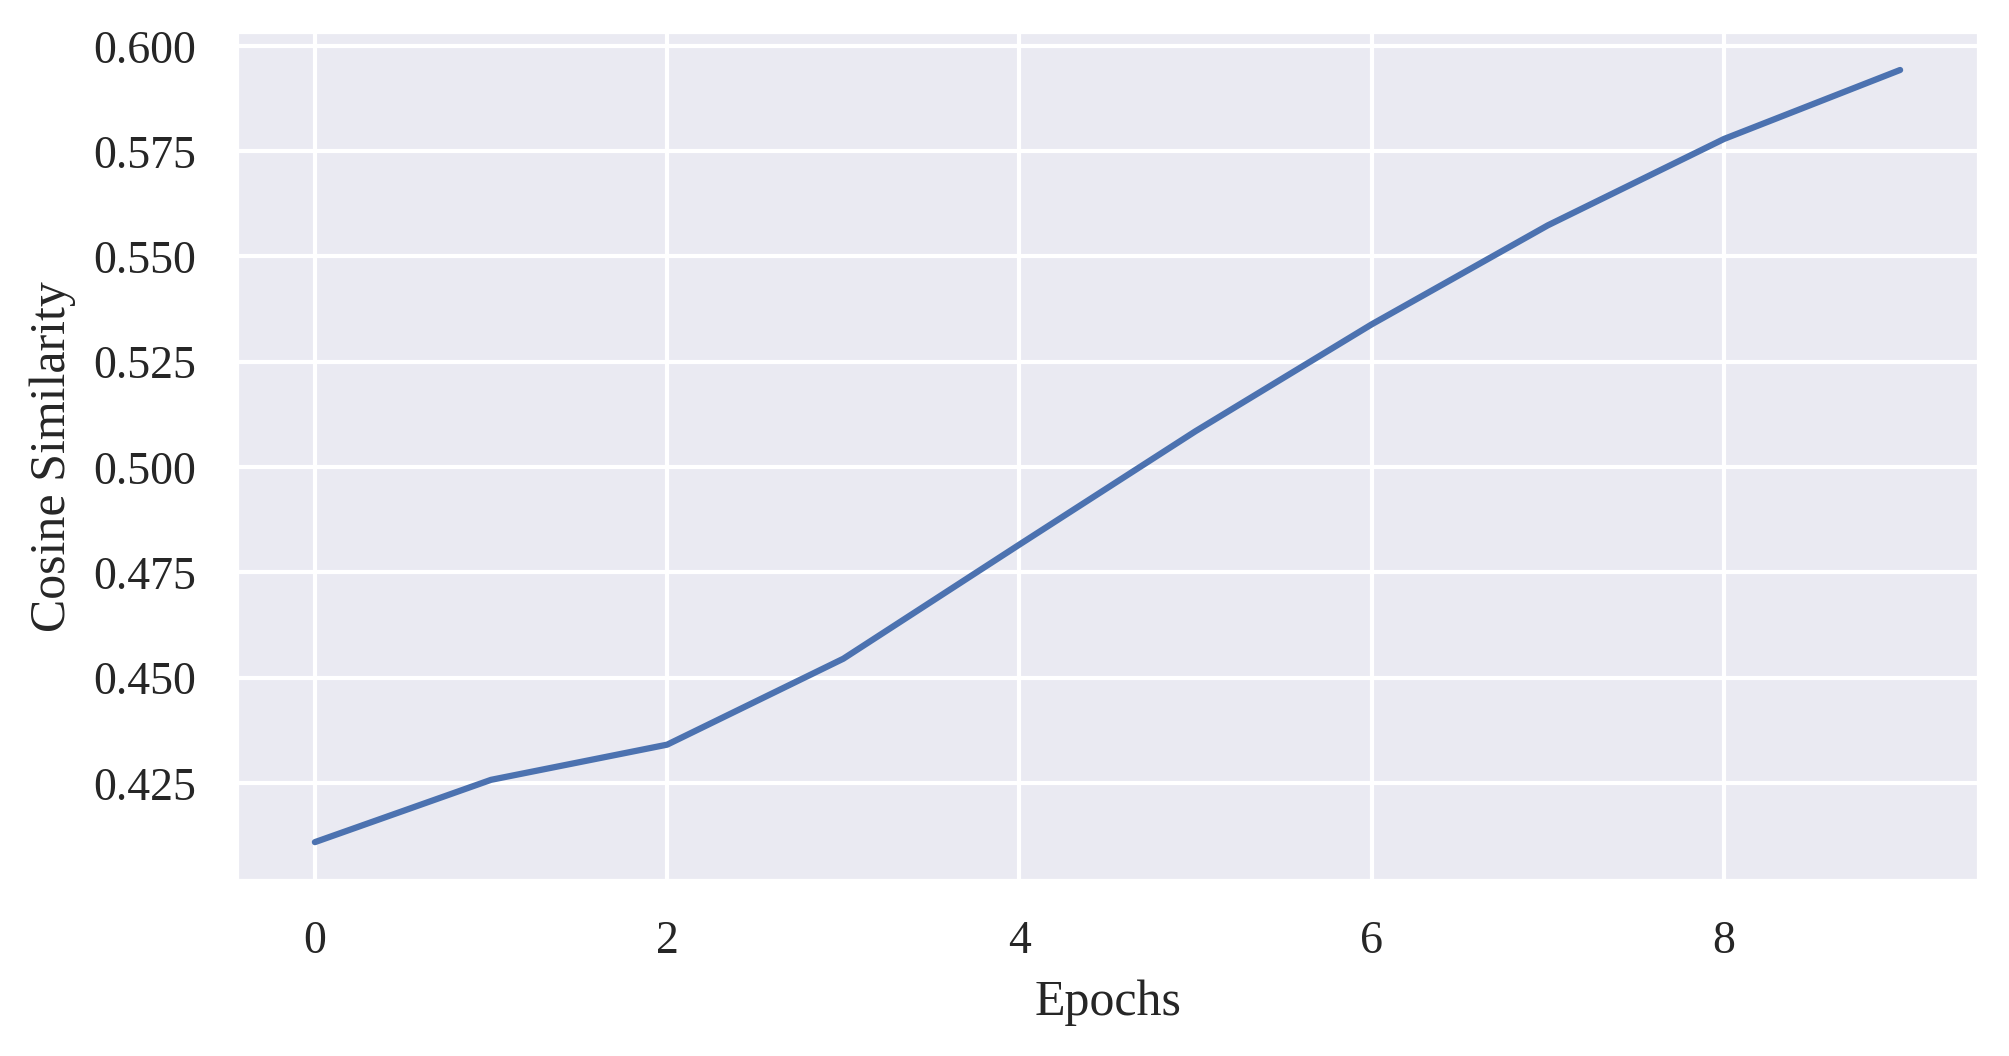

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(font='Liberation Serif',
              rc={'figure.figsize': (7.5,3.75),
                  'font.size': 11,
                  'figure.dpi': 300,
                 })
plt.plot(cosine_similarity)
plt.xlabel('Epochs')
plt.ylabel('Cosine Similarity')
plt.show

Text(0.5, 1.0, 'Training Loss')

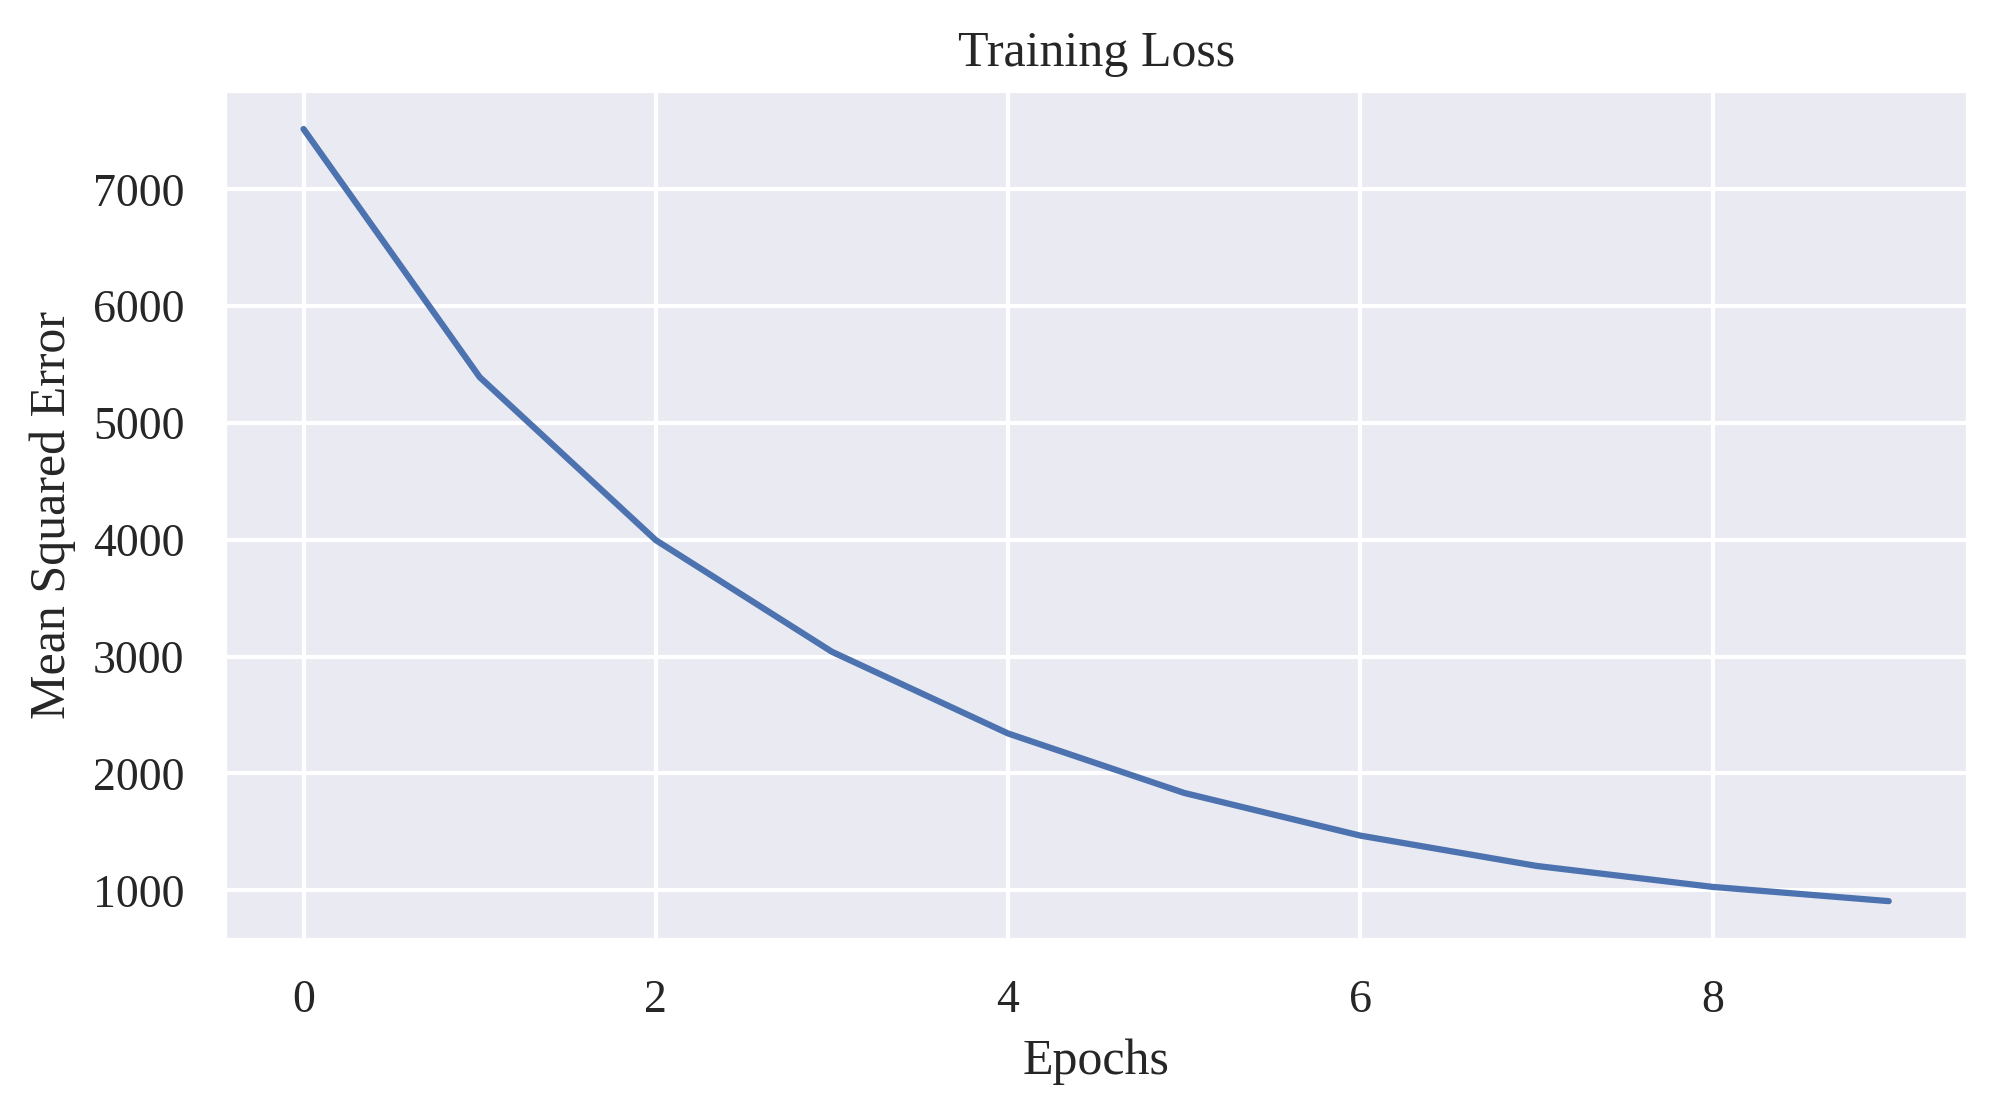

In [35]:
plt.plot(mean_squared_error)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss')

In [16]:
model.

TypeError: 'NoneType' object is not callable

In [18]:
!pip install pydot
!pip install graphviz


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [25]:
import pydot
import graphviz
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
t